# 📊 OCT Dataset Exploration
This notebook performs an initial exploration of the two OCT datasets:
- **Dataset V2**: [Kermany et al. - Mendeley V2](https://data.mendeley.com/datasets/rscbjbr9sj/2)
- **Dataset V3**: [Kermany et al. - Mendeley V3](https://data.mendeley.com/datasets/rscbjbr9sj/3)

We will:
- Count number of images per class
- Preview samples from each class
- Plot class distributions

## 🧠 Retinal Disease Classification with OCT

![Representative OCT Images](../data/image.png)

**Figure:** Representative Optical Coherence Tomography (OCT) images showing different retinal conditions:  
- **CNV**: Choroidal Neovascularization  
- **DME**: Diabetic Macular Edema  
- **DRUSEN**: Associated with Age-Related Macular Degeneration  
- **NORMAL**: Healthy retina  

Retinal Optical Coherence Tomography (OCT) is an imaging technique used to capture high-resolution cross-sections of the retina in living patients. Approximately **30 million OCT scans** are performed each year. The interpretation of these images requires expert analysis and consumes considerable clinical time.  
**Source:** [Kermany et al., 2018, *Cell*](http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)


In [32]:
!pip install squarify

In [23]:
from collections import defaultdict
import os
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import random
import pandas as pd

In [24]:
BASE_PATH_V2 = '../data/OCT2017/OCT2017'
BASE_PATH_V3 = '../data/ZhangLabData/CellData/OCT'

In [25]:
def collect_label_counts(base_path):
    label_counts = defaultdict(int)
    image_paths = defaultdict(list)
    for split in ['train', 'test']:
        split_path = os.path.join(base_path, split)
        if not os.path.isdir(split_path):
            continue
        for label in os.listdir(split_path):
            label_path = os.path.join(split_path, label)
            if os.path.isdir(label_path):
                files = [f for f in os.listdir(label_path) if f.endswith(('.jpeg','.jpg','.png'))]
                label_counts[label] += len(files)
                image_paths[label].extend([os.path.join(label_path, f) for f in files])
    return label_counts, image_paths

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify  # make sure this is installed with: pip install squarify

def plot_label_distribution(counts_dict, title):
    df = pd.DataFrame(list(counts_dict.items()), columns=['Label', 'Count'])

    # Sort by count descending for a cleaner treemap
    df = df.sort_values('Count', ascending=False)

    # Prepare labels with count
    labels = [f"{label}\n{count}" for label, count in zip(df['Label'], df['Count'])]

    # Plot
    plt.figure(figsize=(10, 6))
    squarify.plot(sizes=df['Count'], label=labels, alpha=0.8, color=plt.cm.Blues(df['Count'] / max(df['Count'])))
    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [27]:
def show_sample_images(image_dict, title):
    plt.figure(figsize=(12, 8))
    for i, (label, paths) in enumerate(image_dict.items()):
        if paths:
            img_path = random.choice(paths)
            img = Image.open(img_path)
            plt.subplot(2, 4, i+1)
            plt.imshow(img, cmap='gray')
            plt.title(label)
            plt.axis('off')
        if i >= 7:
            break
    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

In [28]:
counts_v2, images_v2 = collect_label_counts(BASE_PATH_V2)
counts_v3, images_v3 = collect_label_counts(BASE_PATH_V3)

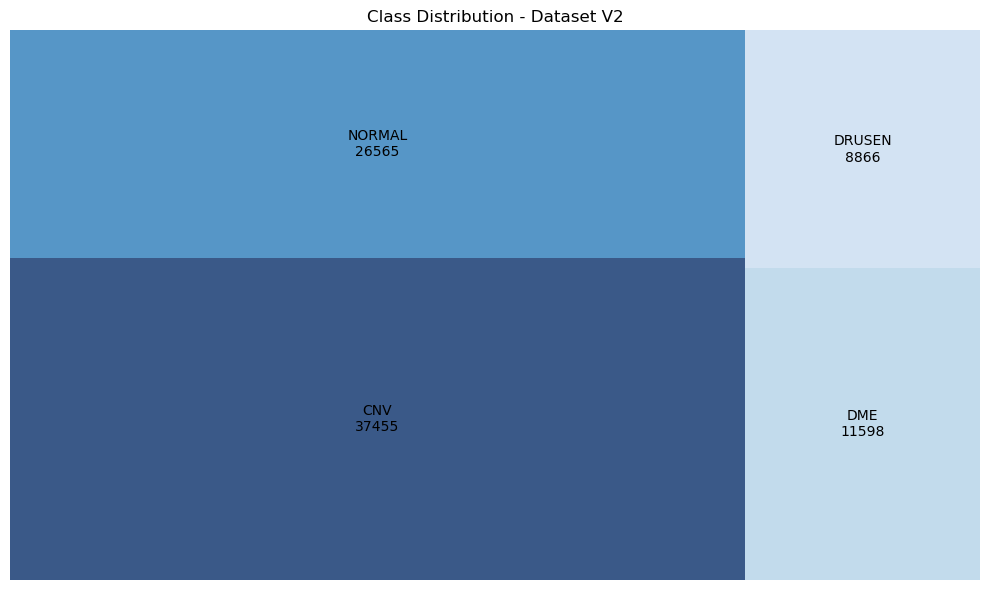

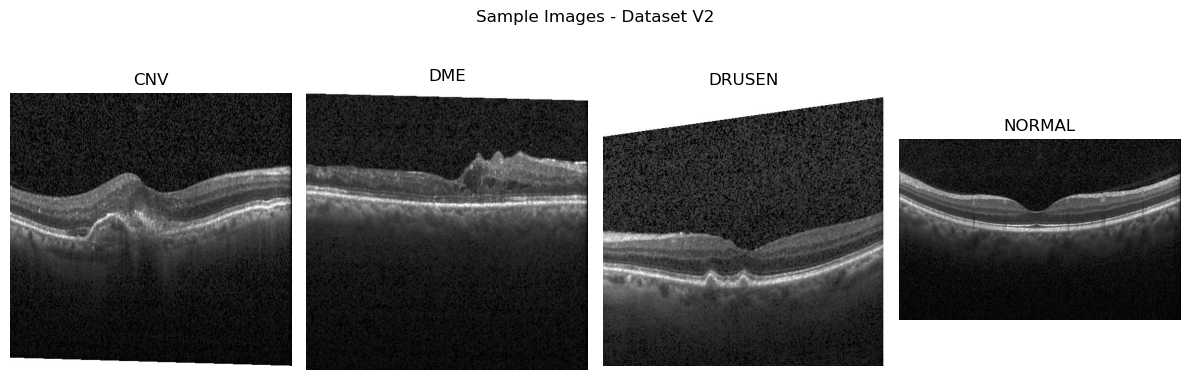

In [34]:
plot_label_distribution(counts_v2, 'Class Distribution - Dataset V2')
show_sample_images(images_v2, 'Sample Images - Dataset V2')

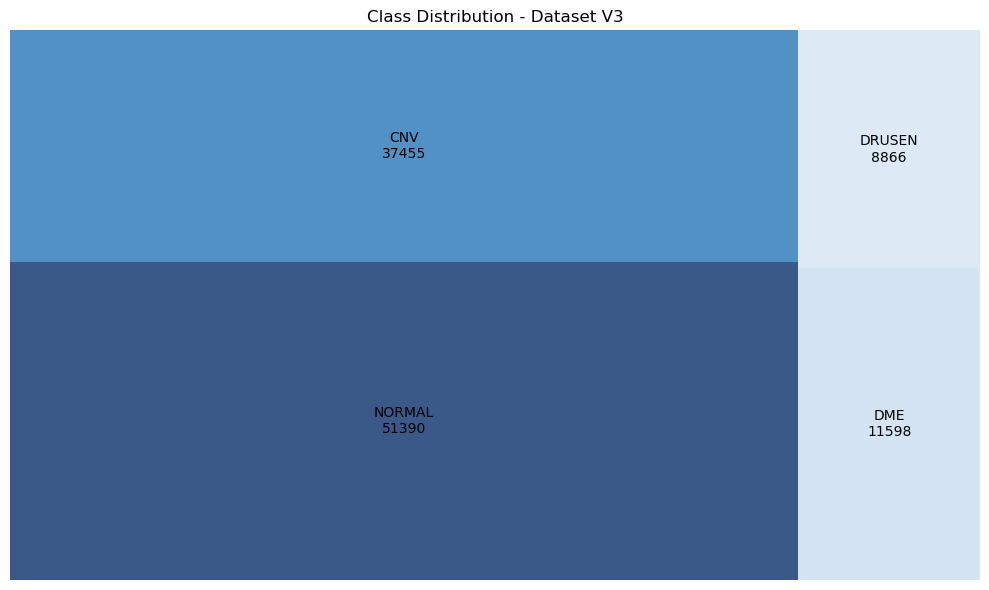

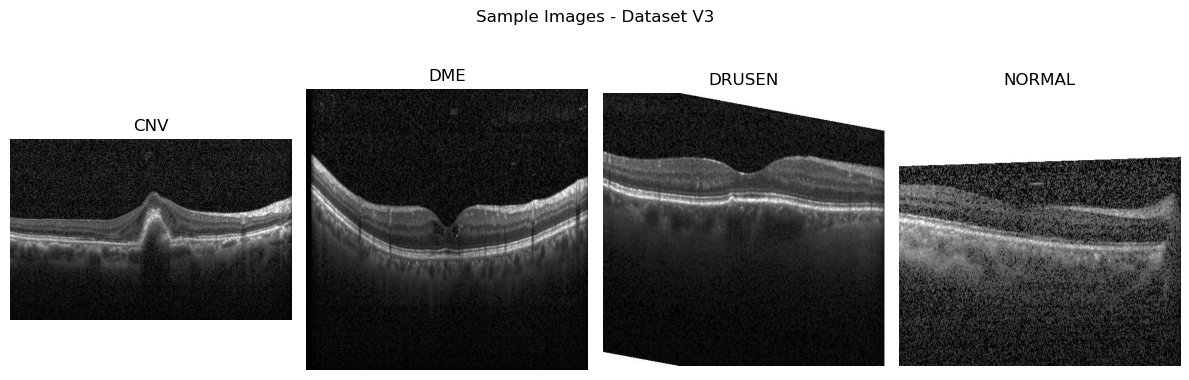

In [35]:
plot_label_distribution(counts_v3, 'Class Distribution - Dataset V3')
show_sample_images(images_v3, 'Sample Images - Dataset V3')